In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df= pd.read_csv("Students_scores.csv")
df["AllScoreAvg"]= ((df["MathScore"]+ df["ReadingScore"]+ df["WritingScore"])/3).round(2)
df.head(10)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,AllScoreAvg
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.00
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,82.33
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.33
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,47.67
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.33
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79,78.67
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89,89.00
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39,41.00
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68,65.67
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50,48.67


In [3]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore,AllScoreAvg
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622,68.118171
std,288.747894,1.458242,15.361616,14.758952,15.443525,14.454324
min,0.000000,0.000000,0.000000,10.000000,4.000000,9.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000,58.330000
50%,500.000000,2.000000,67.000000,70.000000,69.000000,68.330000
75%,750.000000,3.000000,78.000000,80.000000,79.000000,78.670000
max,999.000000,7.000000,100.000000,100.000000,100.000000,100.000000


In [4]:
df['MathScore'].mean().round(2)

66.56

In [5]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
AllScoreAvg               0
dtype: int64

### Dropping the column "Unnamed: 0" that is not required in the analysis

In [6]:
df= df.drop("Unnamed: 0", axis= 1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,AllScoreAvg
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.00
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,82.33
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.33
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,47.67
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.33


In [7]:
df["TransportMeans"].isnull().sum()

3134

### The original analysis part starts here

### Gender distribution visualisation

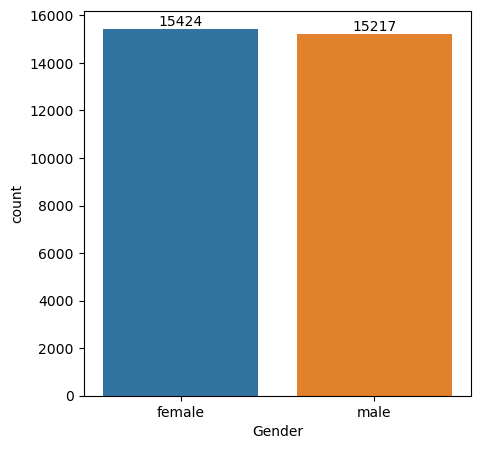

In [8]:
plt.figure(figsize= (5,5))
ax= sb.countplot(data= df, x= "Gender")
ax.bar_label(ax.containers[0])
plt.show()

In [9]:
#From the above chart we have analysed that: 
#There are 207 more females than males

### Analysis based on Parents' Education

In [10]:
par_educ= df.groupby("ParentEduc").agg({"MathScore": 'mean', "ReadingScore": 'mean', "WritingScore": 'mean'})
par_educ

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


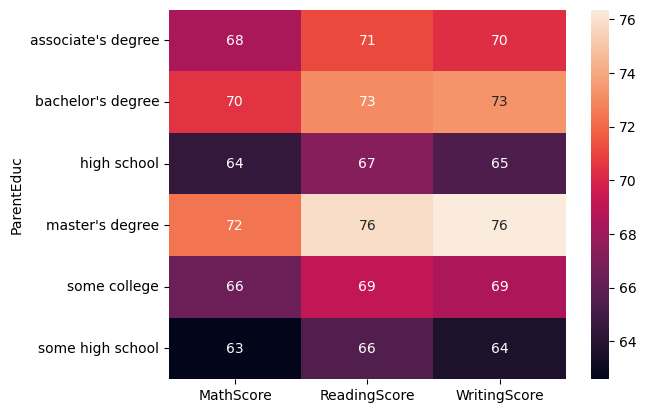

In [11]:
sb.heatmap(par_educ, annot= True)
plt.show()

In [12]:
#From the above chart, we have analysed that:
#Students whose parents have a higher education tend to perform better on an average

#Example: Students whose parents hav Master's Degree (highest degree) have 9 in Maths, 10 in Reading, and 12 in Writing than
#the students whose parents have some High School Degree (lowest degree)

### This analysis will talk about the ethnic composition of the class 

In [13]:
ethnic_group= df["EthnicGroup"].unique()
ethnic_group

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

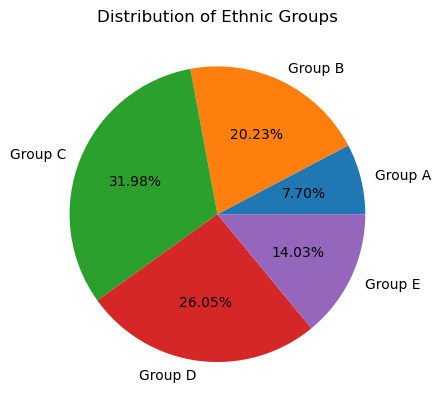

In [14]:
groupA= df.loc[(df["EthnicGroup"]== 'group A')].count()
groupB= df.loc[(df["EthnicGroup"]== 'group B')].count()
groupC= df.loc[(df["EthnicGroup"]== 'group C')].count()
groupD= df.loc[(df["EthnicGroup"]== 'group D')].count()
groupE= df.loc[(df["EthnicGroup"]== 'group E')].count()

list_names= ["Group A", "Group B", "Group C", "Group D", "Group E"]
ethnic_count= [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]
plt.pie(ethnic_count, labels= list_names, autopct= "%1.2f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()

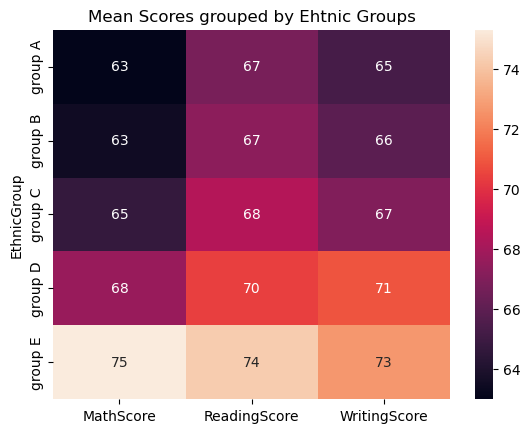

In [15]:
eth_perf= df.groupby("EthnicGroup").agg({"MathScore": 'mean', "ReadingScore": 'mean', "WritingScore": 'mean'})

sb.heatmap(eth_perf, annot= True)
plt.title("Mean Scores grouped by Ehtnic Groups")
plt.show()

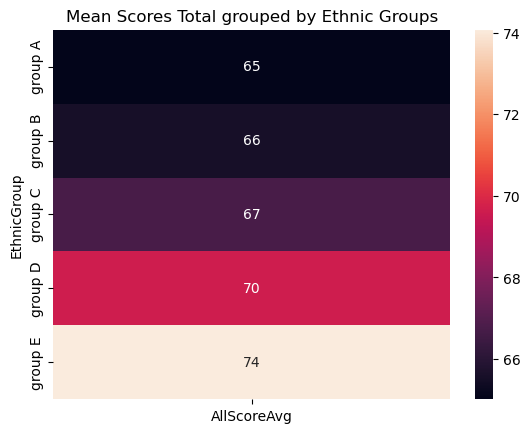

In [16]:
eth_perf_total= df.groupby("EthnicGroup").agg({"AllScoreAvg": 'mean'})

sb.heatmap(eth_perf_total, annot= True)
plt.title("Mean Scores Total grouped by Ethnic Groups")
plt.show()

In [17]:
#From the above, we can analyse that:
#Students belonging to ethnic group E performed better than others, in individual subjects as well as in total
#It can also be analysed that students of ethnic group E have a lot higher Math Score than others

### Correlation of Study Hours with Scores 

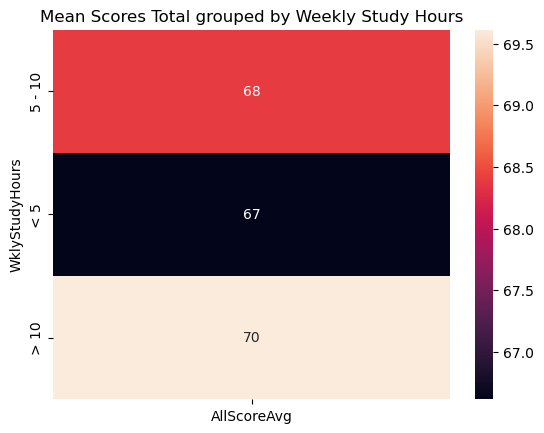

In [18]:
study_hr= df.groupby("WklyStudyHours").agg({"AllScoreAvg": 'mean'})
sb.heatmap(study_hr, annot= True)
plt.title("Mean Scores Total grouped by Weekly Study Hours")
plt.show()

In [19]:
#This analysis suggests that:
#There is not much variation of average marks with hours of studying, it all depends on the capacity to grasp concepts

### Number of siblings and performance correlation

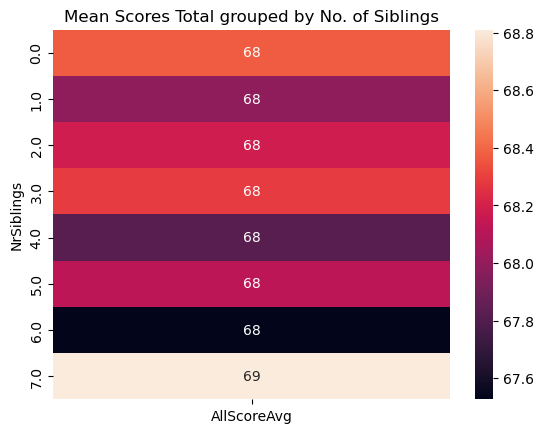

In [20]:
no_of_siblings= df.groupby("NrSiblings").agg({"AllScoreAvg": 'mean'})
sb.heatmap(no_of_siblings, annot= True)
plt.title("Mean Scores Total grouped by No. of Siblings")
plt.show()

In [21]:
#From this, we can analyse that average marks is independent of the number of siblings

### Do the first children of the parents perform better?

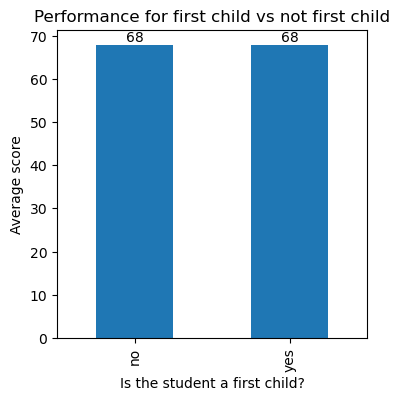

In [67]:
first_child= df.groupby("IsFirstChild").agg({"AllScoreAvg": 'mean'})
first_child["AllScoreAvg"]= first_child["AllScoreAvg"].round()
ax= first_child.plot(kind= "bar", title= "Performance for first child vs not first child", figsize= (4,4), legend= False)
ax.set_xlabel("Is the student a first child?")
ax.set_ylabel("Average score")
ax.bar_label(ax.containers[0])
plt.show()

In [23]:
#From this, we can analyze that being a first child or not doesn't impact the academic performance

### Parents marital status

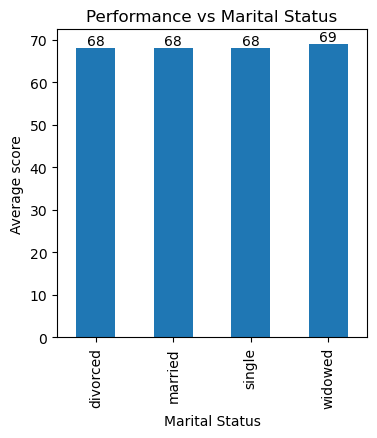

In [65]:
marital_status= df.groupby("ParentMaritalStatus").agg({"AllScoreAvg": 'mean'})
marital_status["AllScoreAvg"]= marital_status["AllScoreAvg"].round()
ax= marital_status.plot(kind= "bar", title= "Performance vs Marital Status", figsize= (4,4), legend= False)
ax.set_xlabel("Marital Status")
ax.set_ylabel("Average score")
ax.bar_label(ax.containers[0])
plt.show()

In [68]:
#From this, we can analyze that the marital status of parents does not impact the perfromance of the students

### Test preparation mode and its effect

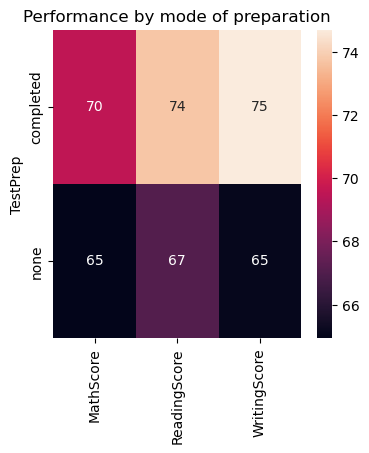

In [72]:
test_prep= df.groupby("TestPrep").agg({"MathScore": 'mean', "ReadingScore": 'mean', "WritingScore": 'mean'})
plt.figure(figsize= (4,4))
sb.heatmap(test_prep, annot= True)
plt.title("Performance by mode of preparation")
plt.show()

In [75]:
#From this analysis, we can understand that students who completed their preparation performed significantly better than others

### Performance vs Lunch Type Analysis

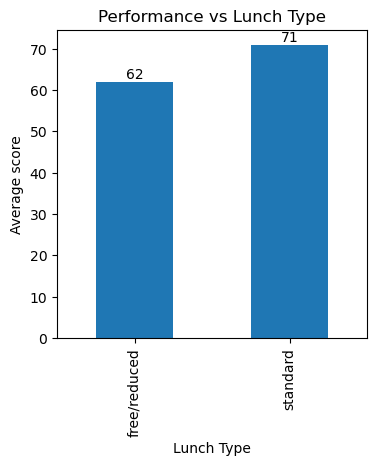

In [79]:
lunch_type= df.groupby("LunchType").agg({"AllScoreAvg": 'mean'})
lunch_type["AllScoreAvg"]= lunch_type["AllScoreAvg"].round()
ax= lunch_type.plot(kind= "bar", title= "Performance vs Lunch Type", figsize= (4,4), legend= False)
ax.set_xlabel("Lunch Type")
ax.set_ylabel("Average score")
ax.bar_label(ax.containers[0])
plt.show()

In [80]:
#Hence, we can conclude that the students who received standard lunch performed better in class.

### Performance vs Sports Activity Analysis

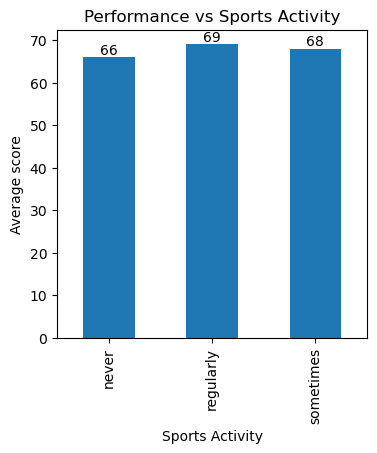

In [81]:
sport= df.groupby("PracticeSport").agg({"AllScoreAvg": 'mean'})
sport["AllScoreAvg"]= sport["AllScoreAvg"].round()
ax= sport.plot(kind= "bar", title= "Performance vs Sports Activity", figsize= (4,4), legend= False)
ax.set_xlabel("Sports Activity")
ax.set_ylabel("Average score")
ax.bar_label(ax.containers[0])
plt.show()

In [82]:
#Hence we can conclude that students who were involved in regular sports activity performed slightly better than others.

### Performance vs Means of transport

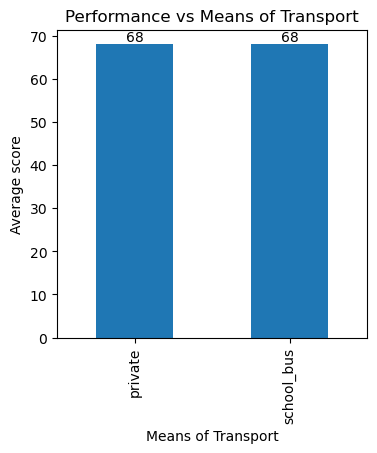

In [83]:
transport= df.groupby("TransportMeans").agg({"AllScoreAvg": 'mean'})
transport["AllScoreAvg"]= transport["AllScoreAvg"].round()
ax= transport.plot(kind= "bar", title= "Performance vs Means of Transport", figsize= (4,4), legend= False)
ax.set_xlabel("Means of Transport")
ax.set_ylabel("Average score")
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
#Hence, from this we can infer that there was no difference in the performance of students based on means of transport